# Анализ данных и процессов
## Лабораторная работа №0. Игра в имитацию.
### Задание 1.
Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Вывести значения частот появления значений 0, 1, 2 и 3. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2*(i+j+k), р1=(j+k)/2*(i+j+k), р2=(i+k)/2*(i+j+k), р3=j/2*(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.

In [357]:
import numpy as np
from scipy.stats import chisquare

i, j, quantile = 2, 3, 1

p = np.array([
    i / (2 * (i + j + quantile)),
    (i + quantile) / (2 * (i + j + quantile)),
    (j + quantile) / (2 * (i + j + quantile)),
    j / (2 * (i + j + quantile))
])
print('(' + ', '.join(map(str, p)) + ')')

(0.16666666666666666, 0.25, 0.3333333333333333, 0.25)


In [358]:
thresholds = np.array([sum(p[:i]) for i in range(1, len(p) + 1)])

N = 10000

y = np.random.rand(N)
x = np.digitize(y, thresholds)

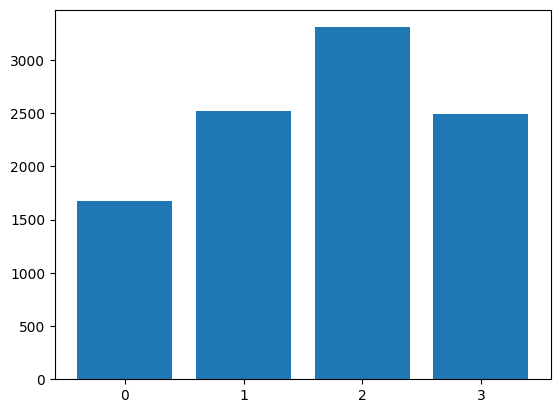

Полученные частоты:  [1675 2525 3308 2492]


In [359]:
from collections import Counter
import matplotlib.pyplot as plt

c = Counter(x)
s_keys = list(range(len(c)))
s_values = np.array([c[key] for key in s_keys])

plt.bar(s_keys, s_values)
plt.xticks(range(len(s_keys)), s_keys)
plt.show()
print("Полученные частоты: ", s_values)

#### Проверка гипотезы сравнением долей 

In [360]:
quantile = 1.96  # Квантиль нормального распределения

p_fact = s_values / N

if all(map(
        lambda pair: np.abs((pair[1] - pair[0]) / np.sqrt(pair[1] * (1 - pair[1]) / N)) <= quantile,
        zip(p, p_fact))
):
    print("Гипотеза принимается.")
else:
    print("Гипотеза отвергается")


Гипотеза принимается.


#### Проверка гипотезы с помощью критерия $\chi^2$

In [361]:
THRESHOLD = 0.05

k, p = chisquare(s_values, p * N)

print(f"K = {k}")
print(f"p = {p}")

if p > THRESHOLD:
    print("Гипотеза принимается.")
else:
    print("Гипотеза отвергается")


K = 0.5097999999999969
p = 0.916733179324492
Гипотеза принимается.


### Задание 2.
Непрерывная случайная величина ξ распределена по экспоненциальному закону с параметром λ соответствующим данным варианта. Построив генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Разбить выборку на интервалы и построить гистограмму частот. Вывести средние арифметическое значений выборки и проверить  на уровне значимости 0,05 соответствие полученных данных показательному распределению с параметром λ. Здесь λ определяется номер по списку разделить на 4.

In [362]:
variant = 9
lambda_value = variant / 4
print(f'\u03BB = {lambda_value}')

λ = 2.25


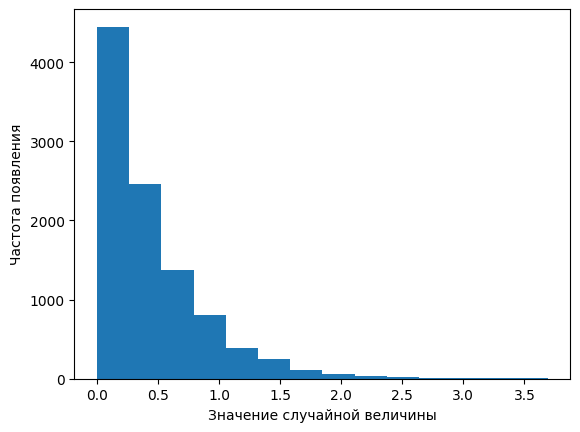

Частоты появления:  [4449 2464 1373  801  388  254  115   59   40   26   12    7    8    4]


In [363]:
y = np.random.rand(N)
x = -(1 / lambda_value) *  np.log(y)

f_fact, edges, _ = plt.hist(x, np.log2(N).astype(int) + 1)
plt.xlabel("Значение случайной величины")
plt.ylabel("Частота появления")
plt.show()
print("Частоты появления: ", f_fact.astype(int))

In [364]:
print(f"Среднее арифметическое: {np.average(x)}")

Среднее арифметическое: 0.44624579422547256


Слияние интервалов, чтобы в каждом было не менее 5 значений

In [365]:
MIN_VALUES = 5

for i in reversed(range(len(f_fact))):
    if f_fact[i] < MIN_VALUES:
        f_fact[i - 1] += f_fact[i]
        f_fact = np.delete(f_fact, i)
        edges = np.delete(edges, i)

print("Частоты появления: ", f_fact.astype(int))

Частоты появления:  [4449 2464 1373  801  388  254  115   59   40   26   12    7   12]


Вычисление теоретических вероятностей и частот

In [366]:
p_exp = np.array([
    np.exp(-lambda_value * edges[i]) - np.exp(-lambda_value * edges[i + 1])
    for i in range(len(edges) - 1)
])

f_exp = p_exp * (N / np.sum(p_exp))

print("Теоретические вероятности =", p_exp.astype(float))
print("Теоретические частоты =", f_exp.astype(int))

Теоретические вероятности = [0.44753221 0.24724094 0.13658923 0.07545926 0.04168777 0.02303057
 0.01272333 0.00702905 0.00388323 0.0021453  0.00118518 0.00065476
 0.00056156]
Теоретические частоты = [4476 2473 1366  754  416  230  127   70   38   21   11    6    5]


#### Проверка гипотезы о показательном распределении

In [367]:
THRESHOLD = 0.05

k, p = chisquare(f_fact, f_exp, ddof=1)

print(f"K = {k}")
print(f"p = {p}")

if p > THRESHOLD:
    print("Гипотеза принимается.")
else:
    print("Гипотеза отвергается")

K = 18.786761336176568
p = 0.06503026344708726
Гипотеза принимается.


## Вывод

В ходе лабораторной работы было сымитировано поведение ДСВ с нормальным распределением и НСВ с показательным распределением. Полученные распределения были проверены при уровне значимости 0.05.